### This notebook will demo the data augmentation features found in `nussl.core.augmentation`

To use, clone my fork of nussl at 

In [10]:
import nussl
import nussl.core.augmentation as augment
from nussl.datasets.hooks import MUSDB18
import matplotlib.pyplot as plt

musdb = MUSDB18()
mix_and_sources = musdb.process_item(0)
mix = mix_and_sources["mix"]

This is what the unaltered track sounds like, as well as the spectrogram.

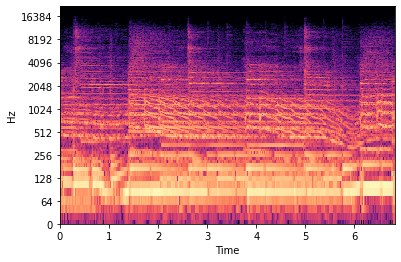

In [12]:
mix.embed_audio()
nussl.utils.visualize_spectrogram(mix, y_axis="log")

### Time stretching
`augment.time_stretch(audio_signal, stretch_factor)`


Stretches the audio signal by a factor of `stretch factor`. For example, when `stretch_factor=2`, then the audio_data becomes two times faster, and when `stretch_factor=.5`, then the audio_data becomes two times slower. 

/home/abugler/nussl/nussl/core/audio_signal.py:1291: UserWarning: Shape of new audio_data does not match current audio_data.
  warnings.warn('Shape of new audio_data does not match current audio_data.')


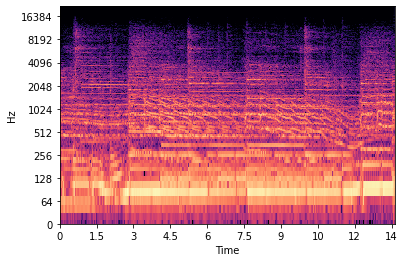

In [15]:
# Slower
fast_mix = augment.time_stretch(mix, .5)
fast_mix.embed_audio()
nussl.utils.visualize_spectrogram(fast_mix, y_axis="log")

/home/abugler/nussl/nussl/core/audio_signal.py:1291: UserWarning: Shape of new audio_data does not match current audio_data.
  warnings.warn('Shape of new audio_data does not match current audio_data.')


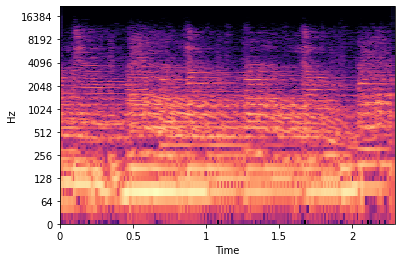

In [16]:
# Faster
fast_mix = augment.time_stretch(mix, 3)
fast_mix.embed_audio()
nussl.utils.visualize_spectrogram(fast_mix, y_axis="log")

### Pitch Shifting 

`augment.pitch_shift(audio_signal, shift)`

Shifts the pitches up by `shift` half steps. If `shift` is negative, the audio is shifted down.

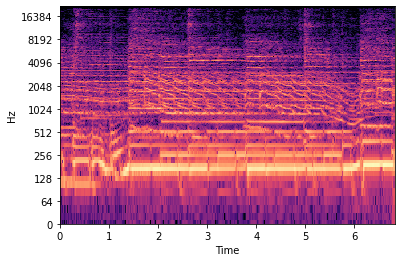

In [17]:
# Higher
high_mix = augment.pitch_shift(mix, 12)
high_mix.embed_audio()
nussl.utils.visualize_spectrogram(high_mix, y_axis="log")

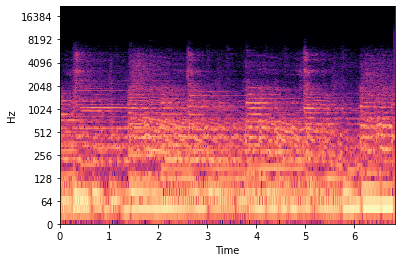

In [18]:
# Lower
low_mix = augment.pitch_shift(mix, -12)
low_mix.embed_audio()
nussl.utils.visualize_spectrogram(low_mix, y_axis="log")

### Low pass and high pass

`augment.low_pass(audio_signal, highest_freq)`

`augment.high_pass(audio_signal, lowest_freq)`

Implements low and high pass, where `highest_freq` and `lowest_freq` represent the thresholds of each filter respectively.

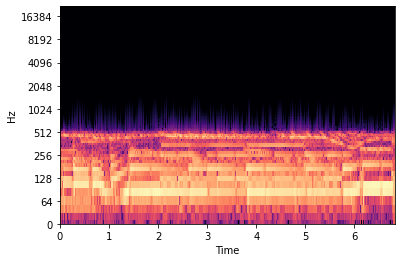

In [21]:
# Low pass
low_pmix = augment.low_pass(mix, 512)
low_pmix.embed_audio()
nussl.utils.visualize_spectrogram(low_pmix, y_axis="log")

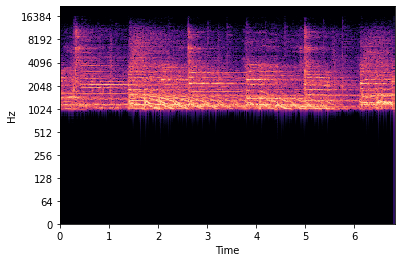

In [22]:
# High pass
high_pmix = augment.high_pass(mix, 1024)
high_pmix.embed_audio()
nussl.utils.visualize_spectrogram(high_pmix, y_axis="log")

### Tremolo and Vibrato

`augment.tremolo(audio_signal, mod_freq,mod_depth)`

`augment.vibrato(audio_signal, mod_freq,mod_depth)`

Applys tremolo/vibrato filter on the audio signal, with a modulation frequency of `mod_freq` Hz, and modulation amplitude of `mod_depth`.

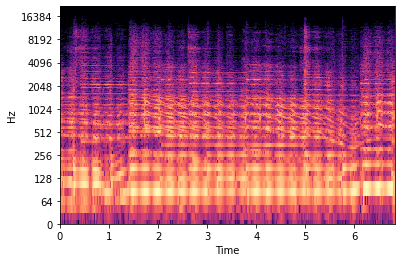

In [39]:
# tremolo
trem_mix = augment.tremolo(mix, 4, .7)
trem_mix.embed_audio()
nussl.utils.visualize_spectrogram(trem_mix, y_axis="log")

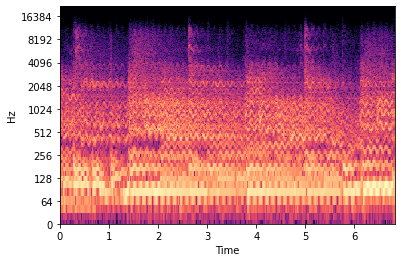

In [40]:
# vibrato
vib_mix = augment.vibrato(mix, 8, .7)
vib_mix.embed_audio()
nussl.utils.visualize_spectrogram(vib_mix, y_axis="log")